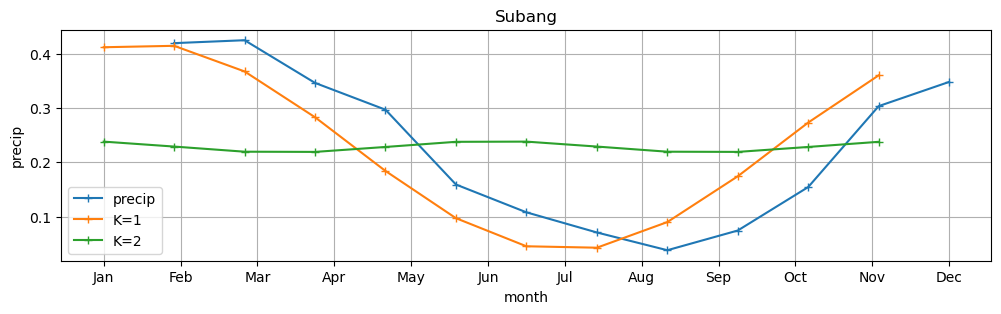

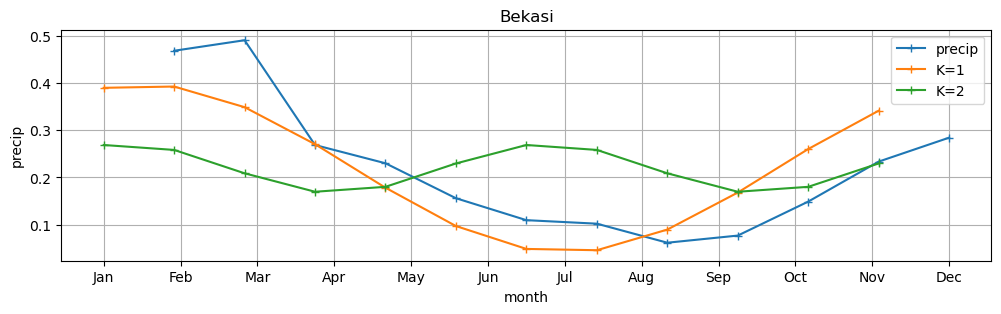

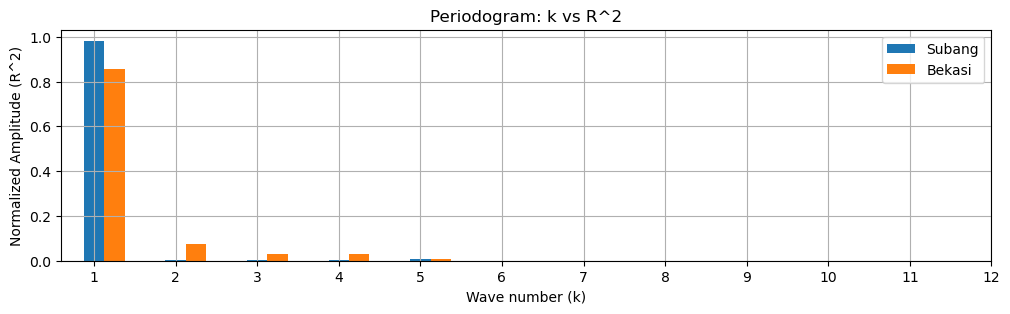

  0% (0 of 16) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 25% (4 of 16) |######                   | Elapsed Time: 0:00:00 ETA:  00:00:00
 37% (6 of 16) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00
 62% (10 of 16) |###############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 93% (15 of 16) |######################  | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (16 of 16) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


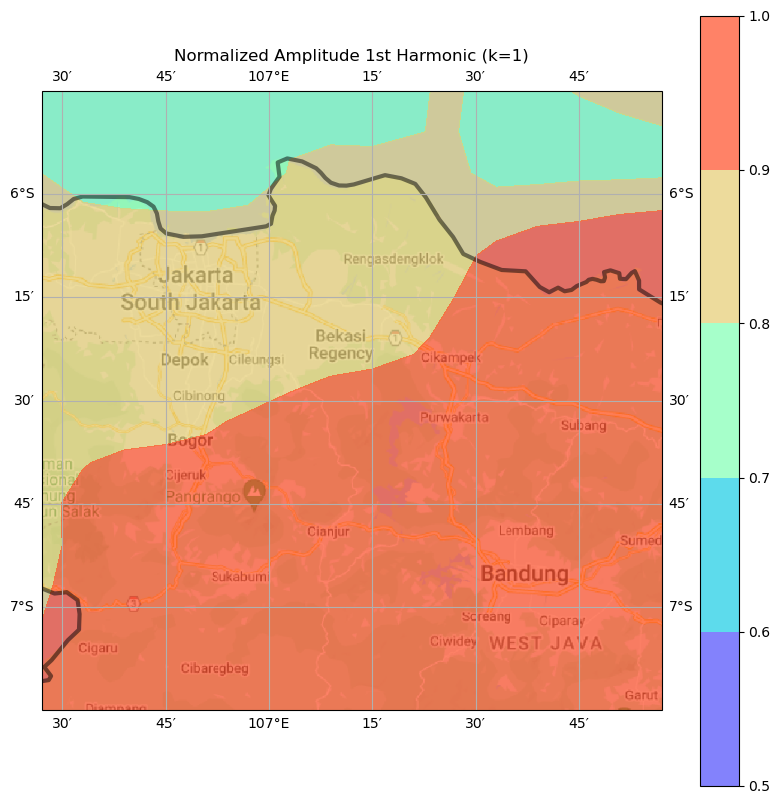

<Figure size 640x480 with 0 Axes>

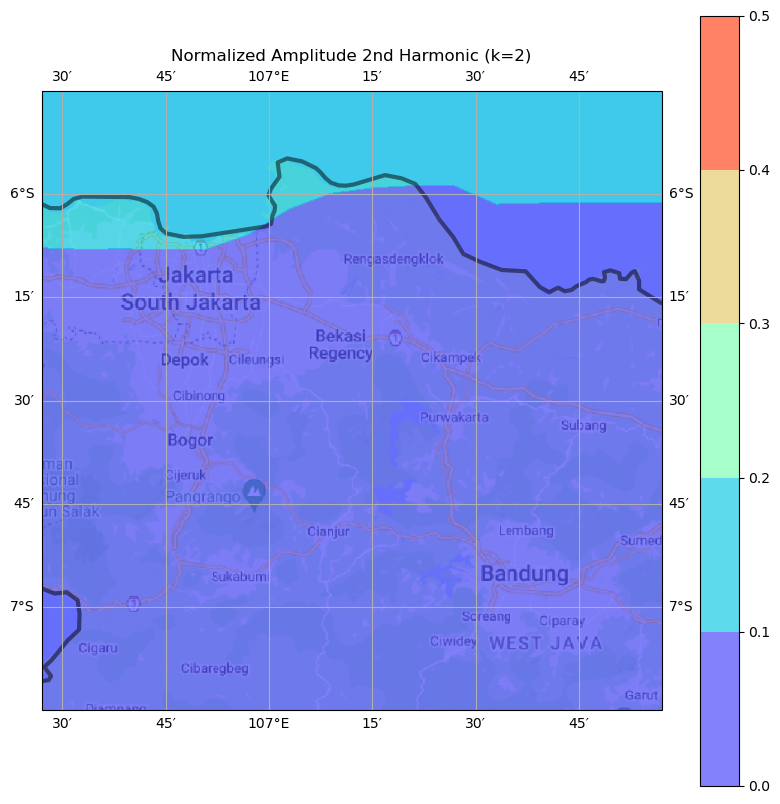

<Figure size 640x480 with 0 Axes>

In [90]:
from matplotlib import figure
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from progressbar import ProgressBar


pr = xr.open_dataarray('gsmap.1hr.citarum.nc')

Subang_loc=[107.75,-6.56] #Subang
Bekasi_loc=[107.02,-6.20] #Bekasi

ts_Subang=pr.groupby('time.month').mean().sel(lon=Subang_loc[0],lat=Subang_loc[1],method='nearest')
ts_Bekasi=pr.groupby('time.month').mean().sel(lon=Bekasi_loc[0],lat=Bekasi_loc[1],method='nearest')

mu_Subang=ts_Subang.mean().values
mu_Bekasi=ts_Bekasi.mean().values
#harmonic analysis
import harmonic
c1,theta1,yi1,k=harmonic.fharmonic(ts_Subang-mu_Subang) # Subang
c2,theta2,yi2,k=harmonic.fharmonic(ts_Bekasi-mu_Bekasi) # Bekasi

#label di sumbu x diganti dengan Bulanan agar mempermudah interpretasi
local_time=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 
ts_Subang.plot(figsize=(12,3),marker='+',label='precip') #data presipitasi
plt.plot(yi1[:,0]+mu_Subang,'+-',label='K=1') #harmonik pertama
plt.plot(yi1[:,1]+mu_Subang,'+-',label='K=2') #harmonik ke-dua
plt.legend()
plt.xticks(np.linspace(0,12,12),local_time)
plt.xlabel('month')
plt.title('Subang')
plt.grid()
plt.savefig('gambar1.png',dpi =300)
plt.show()


#
ts_Bekasi.plot(figsize=(12,3),marker='+',label='precip') #data presipitasi
plt.plot(yi2[:,0]+mu_Bekasi,'+-',label='K=1') #harmonik pertama
plt.plot(yi2[:,1]+mu_Bekasi,'+-',label='K=2') #harmonik ke-dua
plt.legend()
plt.xticks(np.linspace(0,12,12),local_time)
plt.xlabel('month')
plt.title('Bekasi')
plt.grid()
plt.savefig('gambar2.png',dpi =300)
plt.show()


n=ts_Subang.size
r1=n/2*c1**2/((n-1)*np.var(ts_Subang-mu_Subang,ddof=1).values) # Subang
r2=n/2*c2**2/((n-1)*np.var(ts_Bekasi-mu_Bekasi,ddof=1).values) # Bekasi
plt.figure(figsize=(12,3))
plt.bar(k + 0.00, r1, label = 'Subang', width = 0.25)
plt.bar(k + 0.25, r2, label = 'Bekasi', width = 0.25)
plt.xticks(np.linspace(1,12,12))
plt.title('Periodogram: k vs R^2')
plt.xlabel('Wave number (k)')
plt.ylabel('Normalized Amplitude (R^2)')
plt.legend()
plt.grid()
plt.savefig('gambar3.png',dpi =300)
plt.show()


#rata-rata bulanan
prDJF=pr.groupby('time.month').mean()
from progressbar import ProgressBar
pbar = ProgressBar()

#dimensi data
nt,ny,nx=prDJF.shape
#inisialisasi array untuk menyimpan normalized amplitude di setiap titik
C=np.zeros((int(nt/2),ny,nx))
#inisialisasi array untuk menyimpan sudut phasa di setiap titik
PH=np.zeros((int(nt/2),ny,nx))

#looping titik grid
for iy in pbar(range(ny)):
  for ix in range(nx):
    #timeseries
    ts=prDJF[:,iy,ix].values
    n=ts.size
    mu=ts.mean()
    #harmonic analysis
    c,th,yi,k=harmonic.fharmonic(ts-mu)
    #normalized amplitude
    r=n/2*c**2/((n-1)*np.var(ts-mu,ddof=1))
    #
    C[:,iy,ix]=r
    PH[:,iy,ix]=np.degrees(th)

#
lon=prDJF.lon.values
lat=prDJF.lat.values;

# Diurnal
lvl = np.linspace(0.5, 1, 6)
fig  = harmonic.plot_2d(C[0, :, :], lon, lat, levels=lvl, title='Normalized Amplitude 1st Harmonic (k=1)')
fig = plt.gcf()
plt.show()
fig.savefig('diurnal_amplitude.png', dpi=300)
plt.close()

# Semi-diurnal
lvl = np.linspace(0, 0.5, 6)
harmonic.plot_2d(C[1, :, :], lon, lat, levels=lvl, title='Normalized Amplitude 2nd Harmonic (k=2)')
fig = plt.figure()
plt.show()
fig.savefig('semidiurnal_amplitude.png', dpi=300)
plt.close()



